## Bài toán 2: KHÁM PHÁ TỪ  DỮ LIỆU CHI TIÊU TẠI CỬA HÀNG BÁN BUÔN (Unsupervised Learning)
----
**Mô tả dự án:** Tập dữ liệu đề cập tới lịch sử mua hàng của các khách hàng với một nhà phân phối hàng hóa của Bồ đào nha, Nó là các số liệu chi tiêu hàng năm cho các loại sản phẩm rất đa dạng như: 
* Các sản phẩm tươi sống (Fresh) 
* Sữa (Milk) 
* Hàng tạp hóa (Grocery) 
* Sản phẩm đông lạnh (Frozen) 
* Chất tẩy rửa và các sản phẩm giấy (Detergents_Paper)
* Các món ăn bán sẵn (Delicassen)

**Yêu cầu:** Dựa vào các thuộc tính mua hàng của khách hàng tại nhà phân phố này để phân thành các cụm khác nhau, qua đó phân khúc khách hàng. Phân cụm (Clustering) là một thuật toán trong lớp bài toán học không giám sát (Unsupervised Learning), cố gắng thực hiện việc phân cụm dữ liệu dựa trên sự giống nhau của chúng. Do đó, Sẽ không có các kết quả đầu ra (Outcome) của mô hình mà sẽ tìm ra các tâm (center) của cụm tương ứng.


**Tập dữ liệu bao gồm:** 440 dòng, mỗi dòng gồm 8 cột tương ứng với 8 thuộc tính. Chi tiết các thuộc tính như sau:
  

1.  Channel: Thuộc tính cho biết kênh khách hàng mua cuả nhà phần phối: có 2 loại:
  * HoReCa: Khách hàng là một trong số khách sạn (**Ho**tel) | Nhà hàng (**Re**staurant) | Quán cà phê (**Ca**fe)
  * Retail   : Khách hàng là các cửa hàng bán lẻ.
 
2. Region: Thuộc tính cho biết Khu vực (vị trí) khách hàng mua hàng của nhà phân phối , quy vào 3 khu vực chính bao gồm:
  * Lisbon: Khách hàng thuộc khu vực thu đô Lisbon của Bồ đào nha
  * Oporto: Khách hàng thuộc thành phố cảng Porto
  * Other: Khách hàng thuộc các khu vưc khác
  
3.  Fresh: Thuộc tính Lượng tiền chi tiêu hàng năm cho các sản phẩm tươi sống của khách hàng (Loại dữ liệu: Số)
 
4. Milk: Thuộc tính cho biết lượng tiền chi tiêu hàng năm cho các sản phẩm sữa
 
5. Grocery: Thuộc tính cho biết lượng tiền chi tiêu hàng năm cho các loại hàng tạp hóa
 
6. Forzen: Thuộc tính cho biết lượng tiền chi tiêu hàng năm cho các sản phẩm đông lạnh
 
7. Detergents_Paper: Thuộc tính cho biết lượng tiền chi tiêu hàng năm cho các chất tẩy rửa và giấy 
 
8. Delicassen: Thuộc tính cho biết lượng tiền chi tiêu hàng năm cho các món ăn chế biến sẵn

----
khoahocdulieu7080509@Department of Computer Science@FIT-HUMG

In [1]:
#Gọi các thư viện sử dụng cho Project:

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



### 1) Tải tập dữ liệu Wholesale
---
Dữ liệu được lưu trữ trong file Data_Wholesale.csv, thực hiện việc tải các dữ liệu trong file này để tiến hành quan sát và xử lý


In [2]:
path_data ="Data/Data_Wholesale.csv"

#Đọc dữ liệu từ file csv vào biến data
data = pd.read_csv(path_data)
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
5,Retail,Other,9413,8259,5126,666,1795,1451
6,Retail,Other,12126,3199,6975,480,3140,545
7,Retail,Other,7579,4956,9426,1669,3321,2566
8,HoReCa,Other,5963,3648,6192,425,1716,750
9,Retail,Other,6006,11093,18881,1159,7425,2098


In [3]:
print("Danh sách cột dữ liệu trong DataFrame")
print(data.columns.values)

Danh sách cột dữ liệu trong DataFrame
['Channel' 'Region' 'Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper'
 'Delicassen']


### 2) Phân tích số liệu tập Train

In [4]:
#Tổng quan về tập dữ liệu:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(6), object(2)
memory usage: 27.6+ KB
None


In [5]:
print('Kiêm tra số lượng missing data trong tập Tập dữ liệu: \n')
print(data.isnull().sum())


Kiêm tra số lượng missing data trong tập Tập dữ liệu: 

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [6]:
#Phân tích số liệu tập dữ liệu
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
#Thông kê tập dữ liệu Train các thuộc tính có dtype: Object
data.describe(include=['O'])

,Channel,Region
count,440,440
unique,2,3
top,HoReCa,Other
freq,298,316


In [0]:
#Thống kê tập dữ liệu với thuộc tính Channel:

data['Channel'].value_counts()

HoReCa    298
Retail    142
Name: Channel, dtype: int64

In [0]:
#Thống kê tập dữ liệu với thuộc tính Region:

data['Region'].value_counts()

Other     316
Lisbon     77
Porto      47
Name: Region, dtype: int64

### 3) Trực quan hóa tập dữ liệu
---


In [8]:
#Tách tập dữ liệu chỉ lấy thông tin liên quan tới bán các sản phẩm, bỏ dữ liệu thuộc tính Channel, Region

data1 =data.drop(['Channel','Region'], axis=1)

#data1 =data.drop(labels=(['Channel','Region']), axis=1)

#data1 = data.iloc[:,2:8].values


In [9]:
data1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


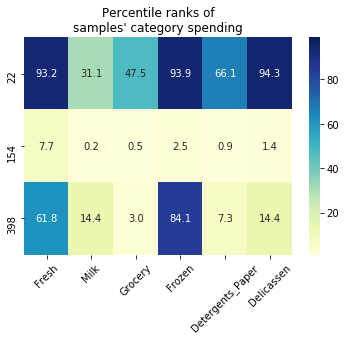

In [0]:
indices = [22,154,398]
pcts = 100. * data1.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
# visualize percentiles with heatmap

sns.heatmap(pcts, annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

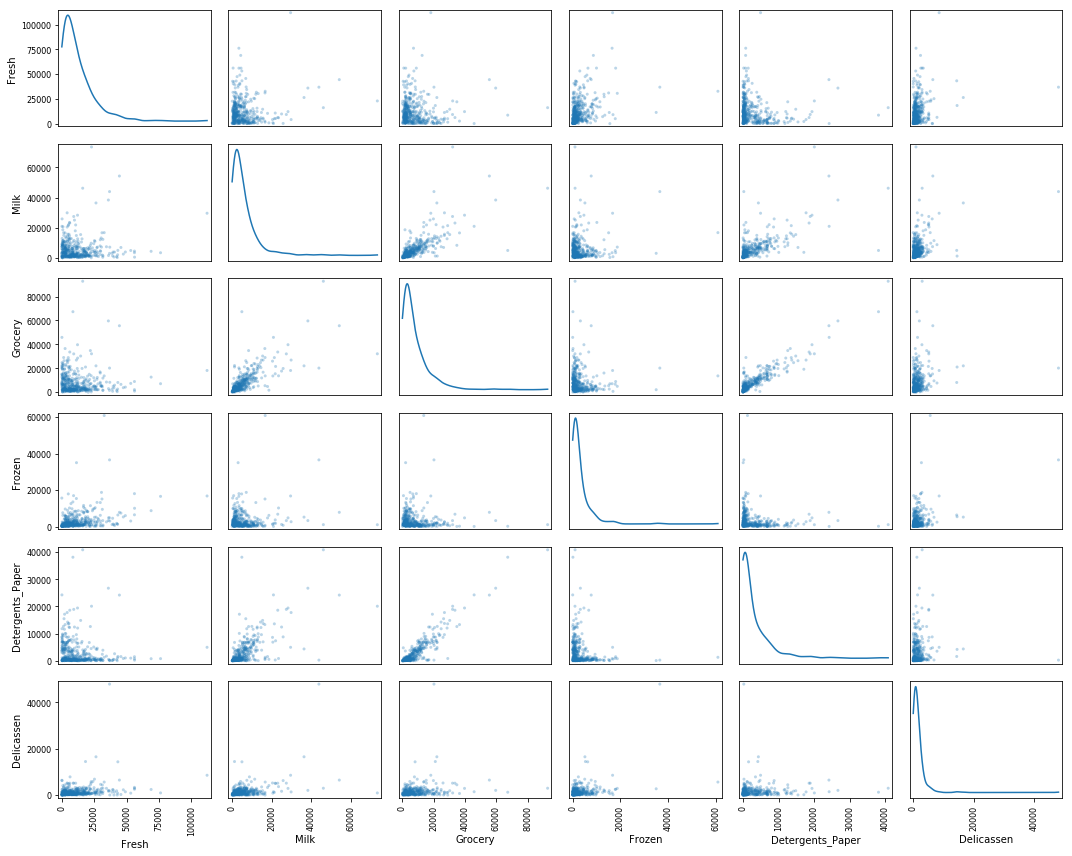

In [10]:
pd.plotting.scatter_matrix(data1, alpha=0.3,figsize=(15,12),diagonal='kde' )
plt.tight_layout() # To avoid overlapping of plots

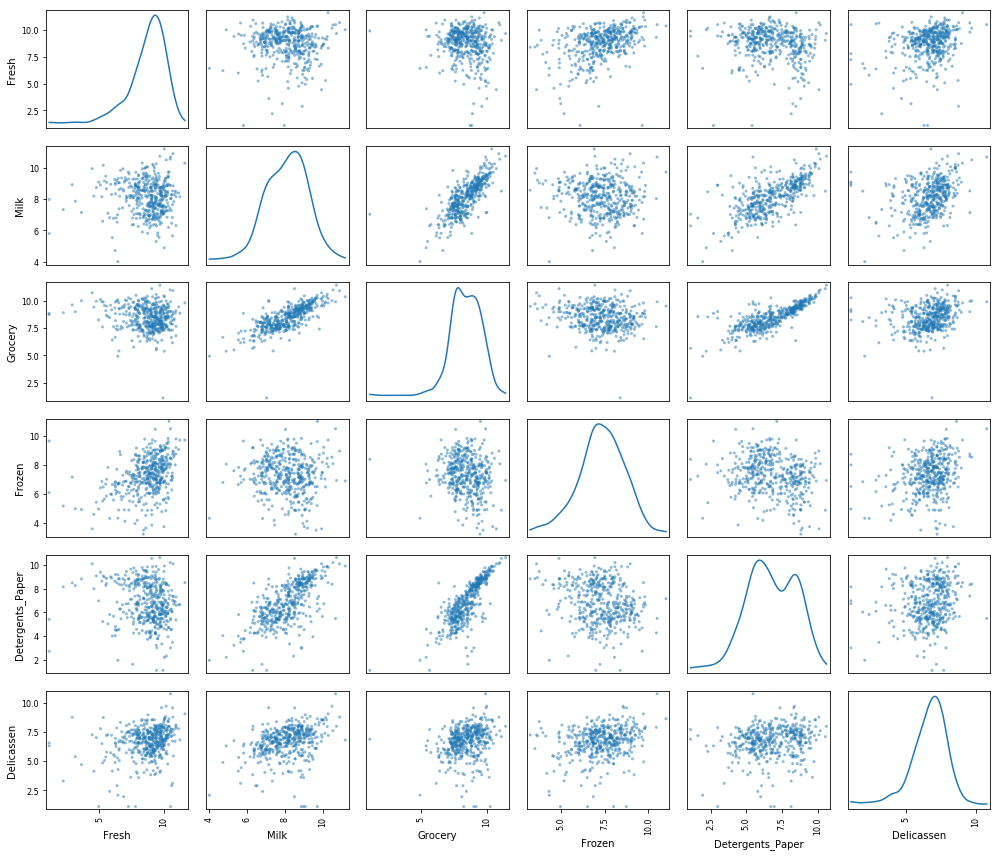

In [0]:
#Scale the data using the natural logarithm
log_data = np.log(data1.copy())

# Scale the sample data using the natural logarithm
samples = pd.DataFrame(data1.loc[indices], columns=data.keys()).reset_index(drop=True)
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha=0.5, figsize=(14,12),diagonal='kde')
plt.tight_layout()

### 4) Tiền xử lý dữ liệu

#### 4.1) Thực hiện: Feature Scaling
----
Khi các features có giá trị giao động trong các khoảng cách xa nhau, thì thuật toán Gradient Descent thường tốn nhiều thơi gian để tìm ra kết quả. Ta có thể tăng tốc gradient descent bằng cách biến đổi các giá trị của feature cho nó nằm trong một khoảng gần giống nhau.

Mục tiêu của quá trình này là làm cho vùng giá trị của các feature càng gần nhau càng tốt.
Có 2 kỹ thuật để làm chuyện này là Feature Scaling và Mean Normalization:

* Feature Scaling là chia input với khoảng giá trị (max – min).

* Mean Normalization là input – giá trị trung bình của input.


In [12]:
# Scale data sử dụng thuật toán tự nhiên

log_data = np.log(data1)

In [13]:
print('Dữ liệu gốc trước khi Scale:')
print(data1[:10])

Dữ liệu gốc trước khi Scale:
   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669   9656     7561     214              2674        1338
1   7057   9810     9568    1762              3293        1776
2   6353   8808     7684    2405              3516        7844
3  13265   1196     4221    6404               507        1788
4  22615   5410     7198    3915              1777        5185
5   9413   8259     5126     666              1795        1451
6  12126   3199     6975     480              3140         545
7   7579   4956     9426    1669              3321        2566
8   5963   3648     6192     425              1716         750
9   6006  11093    18881    1159              7425        2098


In [14]:
print('Dữ liệu gốc sau khi Scale:')
print(log_data[:10])

Dữ liệu gốc sau khi Scale:
       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0   9.446913  9.175335  8.930759  5.365976          7.891331    7.198931
1   8.861775  9.191158  9.166179  7.474205          8.099554    7.482119
2   8.756682  9.083416  8.946896  7.785305          8.165079    8.967504
3   9.492884  7.086738  8.347827  8.764678          6.228511    7.488853
4  10.026369  8.596004  8.881558  8.272571          7.482682    8.553525
5   9.149847  9.019059  8.542081  6.501290          7.492760    7.280008
6   9.403107  8.070594  8.850088  6.173786          8.051978    6.300786
7   8.933137  8.508354  9.151227  7.419980          8.108021    7.850104
8   8.693329  8.201934  8.731013  6.052089          7.447751    6.620073
9   8.700514  9.314070  9.845911  7.055313          8.912608    7.648740


In [15]:
data1.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [16]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [0]:
#Sử dụng thư viện sklearn.preprocessing để Scale Data
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x = sc.fit_transform(data1)
#x

#### 4.2) Thực hiện: Phát hiện các dữ liệu ngoại lai (Outlier Detection)
----
Trong quá trình phân tích thu thập dữ liệu ta thường gặp dữ liệu mà quan sát nó khác biệt so với các giá trị còn lại. Ta gọi là giá trị ngoại lai hay giá trị bất thường. Outlier có thể là giá trị đơn lẻ hoặc cũng có thể từ hai hay nhiều giá trị.

Phát hiện outlier có nhiều ý nghĩa và ứng dụng trong nhiều lĩnh vực như phát hiện gian lận tài chính, phân tích hành vi khách hàng tiêu dùng, phát hiện bệnh tật(các bất thường được quan tâm trong y học vì khả năng xảy ra bệnh cao)

In [17]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5 
# Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
237,9.835851,8.252707,6.385194,8.441176,3.332205,7.102499
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


In [0]:
#outlier Fresh:

data1.iloc[[66,95,96, 218, 338]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,9,1534,7417,175,3468,27
95,3,2920,6252,440,223,709
96,23,2616,8118,145,3874,217
218,18,7504,15205,1285,4797,6372
338,3,333,7021,15601,15,550


In [0]:
#outlier Grocery:

data1.iloc[[75]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,20398,1137,3,4407,3,975


In [0]:
#outlier Frozen:

data1.iloc[[38,65,420]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,4591,15729,16709,33,6956,433
65,85,20959,45828,36,24231,1423
420,4456,5266,13227,25,6818,1393


In [0]:
#outlier Detergents_Paper:

data1.iloc[[75,122,142,154, 161, 177, 204, 237, 289, 338,356, 402]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,20398,1137,3,4407,3,975
122,12212,201,245,1991,25,860
142,37036,7152,8253,2995,20,3
154,622,55,137,75,7,8
161,12434,540,283,1092,3,2233
177,12759,7330,4533,1752,20,2631
204,1956,891,5226,1383,5,1328
237,18692,3838,593,4634,28,1215
289,42786,286,471,1388,32,22
338,3,333,7021,15601,15,550


In [18]:
#outlier Delicassen:

data1.iloc[[66,109,128,137, 142, 154, 184, 187, 203, 233, 285, 289]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,9,1534,7417,175,3468,27
109,1406,16729,28986,673,836,3
128,140,8847,3823,142,1062,3
137,3087,8080,8282,661,721,36
142,37036,7152,8253,2995,20,3
154,622,55,137,75,7,8
184,327,918,4710,74,334,11
187,2438,8002,9819,6269,3459,3
203,583,685,2216,469,954,18
233,964,4984,3316,937,409,7


In [0]:
#Lựa chọn các hàng xóa khỏi tập dữ liệu:
data1.iloc[[66,75, 142, 154, 289, 338]]

In [0]:
#THỰC HIỆN LOẠI BỎ MỘT SỐ ROW CỦA TẬP DỮ LIỆU CÓ OUTLIER
# Select the indices for data points you wish to remove
outliers  = [66, 75, 142, 154, 289, 338]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

In [0]:
good_data.info()

In [0]:
good_data.describe()

#### 4.3) Lưu dữ liệu sau khi đã tiền xử lý ra file
---


In [0]:
#Lưu dữ liệu sau khi đã tiền xử lý ra file:
good_data.to_csv('Wholesale_finish.csv', index=None, header=True)

## 5) Xây dựng model
----


### 5.1) Chuẩn bị dữ liệu cho model
---


In [1]:
#Đọc file dữ liệu từ File .csv
#Mount tới google drive để tải tập dữ liệu
import pandas as pd

path_data ="Data/Wholesale_finish.csv"

train_df = pd.read_csv(path_data)

train_df.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


### 5.2) Thực hiện phân cụm với thuật toán: KMeans
---

Phân cụm là kỹ thuật rất quan trọng trong khai phá dữ liệu, nó thuộc lớp các phương pháp Unsupervised Learning trong Machine Learning. Mục đích của phân cụm là tìm ra bản chất bên trong các nhóm của dữ liệu. Các thuật toán phân cụm (Clustering Algorithms) đều sinh ra các cụm (clusters).

K-Means là thuật toán rất quan trọng và được sử dụng phổ biến trong kỹ thuật phân cụm. Tư tưởng chính của thuật toán K-Means là tìm cách phân nhóm các đối tượng (objects) đã cho vào K cụm (K là số các cụm được xác đinh trước, K nguyên dương) sao cho tổng bình phương khoảng cách giữa các đối tượng đến tâm nhóm (centroid ) là nhỏ nhất.


In [23]:
#Thực hiện phân cụm tập dữ liệu
#Gọi thư viện sklearn
from sklearn.cluster import KMeans

#Phân tập dữ liệu vào 4 cụm
km = KMeans(n_clusters = 4, init = 'k-means++')
#Huấn luyện model
km.fit(train_df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
y_kmeans_pred = km.predict(train_df)

#Hiển thị kết quả phân cụm cho tập 
print('Số điểm phân cụm dữ liệu: ', len(y_kmeans_pred))
print('Kết quả phân cụm cho các điểm:\n',y_kmeans_pred)
print('Số phần tử thuộc lớp 0:',(y_kmeans_pred==0).sum())
print('Số phần tử thuộc lớp 1:',(y_kmeans_pred==1).sum())
print('Số phần tử thuộc lớp 2:',(y_kmeans_pred==2).sum())
print('Số phần tử thuộc lớp 3:',(y_kmeans_pred==3).sum())

Số điểm phân cụm dữ liệu:  434
Kết quả phân cụm cho các điểm:
 [0 0 0 3 3 0 0 0 0 0 0 1 0 0 0 1 2 3 0 0 0 1 3 0 0 2 1 1 0 3 0 3 1 3 1 2 3
 0 2 3 3 0 2 2 2 0 0 0 0 0 3 2 0 2 3 0 0 2 1 0 2 0 0 0 3 2 0 3 1 3 0 3 3 0
 3 0 1 2 1 2 0 3 0 0 0 3 1 3 1 3 0 3 2 2 2 1 1 1 0 0 0 3 3 1 2 0 2 2 1 0 3
 3 1 1 1 3 3 3 1 1 1 0 3 3 3 0 2 3 3 1 1 1 1 1 0 2 1 1 3 1 3 1 0 1 3 1 1 1
 1 1 1 0 0 3 0 2 0 1 3 0 0 0 0 2 1 1 2 2 2 2 1 2 3 1 1 3 0 0 2 3 2 1 1 2 0
 2 1 1 1 2 1 3 3 0 3 1 0 0 3 2 1 2 1 2 2 0 3 0 1 0 0 0 2 1 2 1 1 2 1 3 1 3
 0 1 2 3 3 2 1 2 3 2 1 1 1 3 3 3 3 0 0 0 1 1 1 3 1 0 3 3 0 1 1 3 3 3 1 1 1
 3 2 3 0 3 0 1 1 1 1 3 1 1 3 1 3 0 1 0 3 3 3 1 1 3 1 1 1 3 0 3 2 3 0 0 1 0
 0 2 2 2 2 0 1 1 2 3 3 2 1 3 0 1 2 1 0 1 3 3 3 3 3 1 1 3 3 3 0 3 0 3 0 1 3
 3 2 0 2 2 1 2 0 0 1 0 1 0 1 2 3 1 1 2 3 1 3 1 1 2 1 0 1 1 1 1 3 3 3 0 1 1
 0 1 1 2 3 3 0 1 3 1 1 1 1 1 1 1 1 3 1 1 0 1 1 1 1 3 1 1 3 1 3 0 0 0 3 3 2
 3 3 0 0 0 2 3 2 0 3 3 0 3 0 3 3 1 1 3 1 1 0 3 3 0 1 2]
Số phần tử thuộc lớp 0: 112
Số phần tử thuộc lớp 1: 139


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


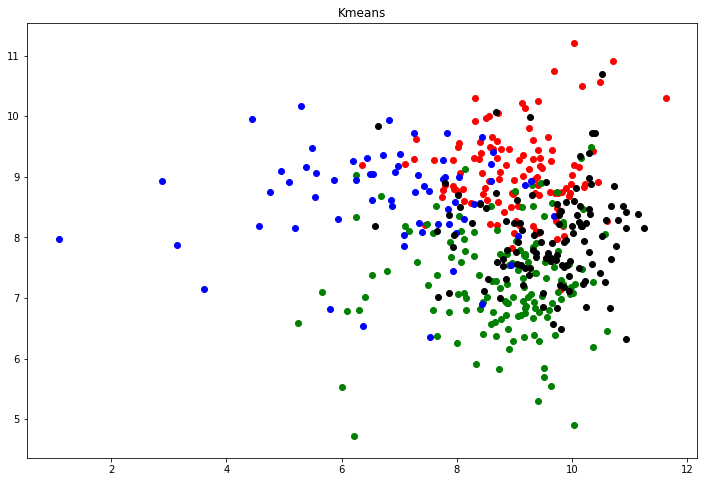

In [29]:
#Trực quan hóa kết quả:

X1 = train_df.as_matrix()
#print(type(X1))

plt.figure(figsize = (12,8))
plt.scatter(X1[y_kmeans_pred == 0,0],X1[y_kmeans_pred == 0,1],color = 'red')
plt.scatter(X1[y_kmeans_pred == 1,0],X1[y_kmeans_pred == 1,1],color = 'green')
plt.scatter(X1[y_kmeans_pred == 2,0],X1[y_kmeans_pred == 2,1],color = 'blue')
plt.scatter(X1[y_kmeans_pred == 3,0],X1[y_kmeans_pred == 3,1],color = 'black')

plt.title('Kmeans')
plt.show()
